<a href="https://colab.research.google.com/github/Chhayaonly/food101/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the required libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

train = pd.read_csv('/content/updated_pollution_dataset.csv')

X=train.drop(columns='Air Quality')
y=train['Air Quality']

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy of Decision Tree Classifier:  0.902
Precision of Decision Tree Classifier:  0.9042121178874093
Recall of Decision Tree Classifier:  0.902
F1-Score of Decision Tree Classifier:  0.9025065013674987
              precision    recall  f1-score   support

        Good       1.00      0.98      0.99       409
   Hazardous       0.73      0.84      0.78       111
    Moderate       0.92      0.93      0.92       294
        Poor       0.77      0.73      0.75       186

    accuracy                           0.90      1000
   macro avg       0.86      0.87      0.86      1000
weighted avg       0.90      0.90      0.90      1000

{'max_depth': 9}


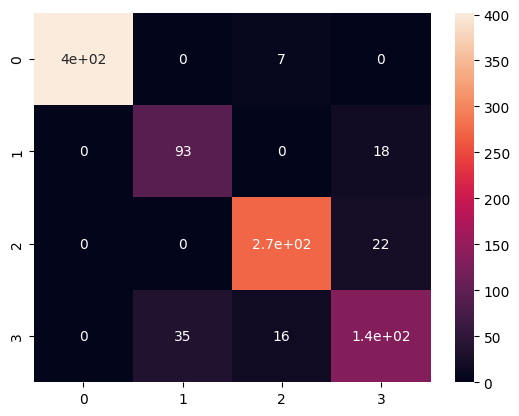

In [2]:
# DECISION TREE CLASSIFIER
dt = DecisionTreeClassifier(random_state=1, max_depth = 5)
# train the model
dt.fit(X_train, y_train)
# make predictions
dt_pred = dt.predict(X_test)
# print the accuracy
print("Accuracy of Decision Tree Classifier: ", accuracy_score(y_test, dt_pred))
# print other performance metrics
print("Precision of Decision Tree Classifier: ", precision_score(y_test, dt_pred, average='weighted'))
print("Recall of Decision Tree Classifier: ",  recall_score(y_test, dt_pred, average='weighted'))
print("F1-Score of Decision Tree Classifier: ", f1_score(y_test, dt_pred, average='weighted'))
print(classification_report(y_test, dt_pred))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True)

Tree_params = {'max_depth': [1,3,5,7,9,11]}  # dictionary with hyperparameters as keys and possible values to check as values

Masterclf = GridSearchCV(dt, Tree_params, scoring='accuracy')

Masterclf.fit(X_train, y_train)
print(Masterclf.best_params_)

Accuracy of Random Forest Classifier:  0.94
Precision of Random Forest Classifier:  0.9405844856098381
Recall of Random Forest Classifier:  0.94
F1-Score of Random Forest Classifier:  0.9402028833345453
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       409
   Hazardous       0.87      0.84      0.85       111
    Moderate       0.96      0.95      0.95       294
        Poor       0.83      0.86      0.84       186

    accuracy                           0.94      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000

{'n_estimators': 9}


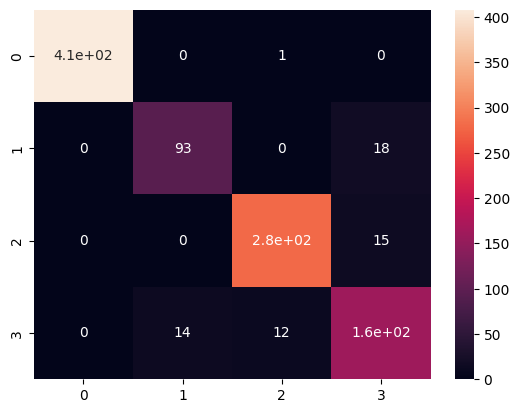

In [3]:
# RANDOM FOREST CLASSIFIER
rf = RandomForestClassifier(random_state=1, n_estimators=7)

# Train the model
rf.fit(X_train, y_train)

# Make predictions using the trained Random Forest model
rf_pred = rf.predict(X_test)

# Print the accuracy
print("Accuracy of Random Forest Classifier: ", accuracy_score(y_test, rf_pred))

# Print other performance metrics
print("Precision of Random Forest Classifier: ", precision_score(y_test, rf_pred, average='weighted'))
print("Recall of Random Forest Classifier: ", recall_score(y_test, rf_pred, average='weighted'))
print("F1-Score of Random Forest Classifier: ", f1_score(y_test, rf_pred, average='weighted'))
print(classification_report(y_test, rf_pred))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True)

# Grid Search for Random Forest hyperparameters
forest_params = {'n_estimators': [1, 3, 5, 7, 9]}

clf = GridSearchCV(rf, forest_params, scoring='accuracy')

clf.fit(X_train, y_train)
print(clf.best_params_)


In [4]:
#logistic regression
logreg=LogisticRegression(random_state=42).fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


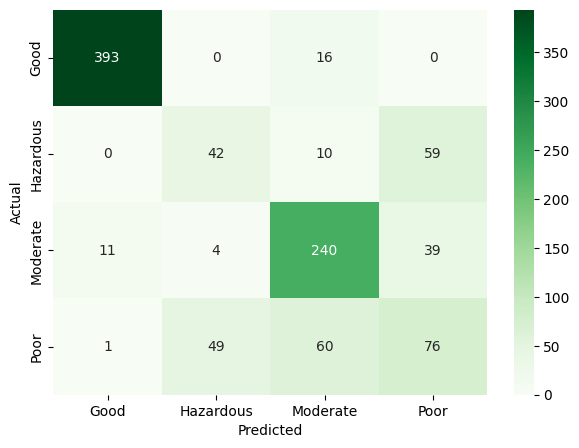

              precision    recall  f1-score   support

        Good       0.97      0.96      0.97       409
   Hazardous       0.44      0.38      0.41       111
    Moderate       0.74      0.82      0.77       294
        Poor       0.44      0.41      0.42       186

    accuracy                           0.75      1000
   macro avg       0.65      0.64      0.64      1000
weighted avg       0.74      0.75      0.75      1000



In [5]:
y_pred= logreg.predict(X_test)
#confusion matrix
cm=confusion_matrix(y_test,y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test,y_pred))

In [6]:
#Accuracy, Precision, Recall, and F1-Score were calculated for each model.
#Confusion matrices were visualized using heatmaps.

#1.)Decision Tree:
'''Performs moderately well with an accuracy of (~90% ).
Can overfit on training data if the maximum depth is not controlled, but GridSearchCV mitigates this issue.
'''
#2.)Random Forest:
'''Achieves the highest accuracy and F1-Score (~94%).
The ensemble approach effectively handles overfitting and works well for feature-rich datasets.
'''
#3.)Logistic Regression:
'''Comparitively low accuracy (~75%)
Simplest model but underperforms compared to tree-based models for this dataset.
Likely due to non-linear relationships in the data that it cannot capture effectively.
'''
#Random Forest Classifier stands out as the best-performing model due to:
'''
Its high accuracy and F1-Score, indicating balanced performance across classes.
Robustness to overfitting compared to Decision Trees.
The ability to model complex, non-linear relationships in the dataset.
'''
#Why Random Forest Works Best:
'''Reduces Overfitting: By averaging multiple decision trees, Random Forest reduces the risk of overfitting and improves generalization to new data.

Robustness: It handles noise and variability well, making it less sensitive to anomalies.

Feature Importance: Identifies the significance of features, aiding in understanding and feature selection.'''

'Reduces Overfitting: By averaging multiple decision trees, Random Forest reduces the risk of overfitting and improves generalization to new data.\n\nRobustness: It handles noise and variability well, making it less sensitive to anomalies.\n\nFeature Importance: Identifies the significance of features, aiding in understanding and feature selection.'